In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.spatial import distance_matrix
from sklearn.linear_model import LinearRegression

In [3]:
import random

In [40]:
def regression_based_outlier_detection(ts_data, neighbor, station, n_regressors = 3, n_variables = 3, eps=1) :
    result = np.array([], dtype='int')
    for i in range(n_regressors) : 
        idx = random.choices(neighbor[station],k=n_variables)
        y = ts_data[station] 
        X = ts_data[idx]
        reg = LinearRegression().fit(X.T, y)
#         print(reg.score(X.T, y))
        original = ts_data[station]
        predict = reg.intercept_ + np.dot(X.T, reg.coef_)
#         print(abs(predict - original))
        ix = np.where(abs(predict - original) > eps)
#         print(ix)
        result = np.append(result, ix)
#         print(result)

    unique, counts = np.unique(result, return_counts=True)
    RESULT = dict(zip(unique, counts))
#     print(RESULT)
    return {k:v for k, v in sorted(RESULT.items(), key=lambda item: item[1], reverse = True) if v>n_regressors * 0.7}
#     return {k: v for k, v in sorted(RESULT.items(), key=lambda item: item[1])}

    
    

# CREATING SIMULATION DATA

In [172]:
x_length = 200
y_length = 200

n_stations = 3200
time_length = 10000

k = 10


In [173]:
#random metadata creation 
metadata = np.zeros((n_stations,2), dtype='int')
for i in range(n_stations) : 
    x = random.choice(range(x_length))
    y = random.choice(range(y_length))
    metadata[i] = [x,y]



In [174]:
#neighbor list
dist_matrix = distance_matrix(metadata,metadata)
neighbor = dist_matrix.argsort()[:, 1:k+1]

In [175]:
#random data creation 
ts_data = np.zeros((n_stations, time_length))
lst_failed_station = []
s = random.choice(range(20,30,1))
for time_step in range(time_length) :        
    temperature = random.choice(range(s-3,s+3,1))
    val = temperature + np.random.rand(n_stations)    
    #add random noise with 10% prop
    if random.random() < 0.1 : 
        failed_station = random.choice(range(n_stations))
        noise = random.random() * 20
        sign = random.choice([-1,1])
        
        val[failed_station] = val[failed_station] + noise * sign 
        print(failed_station, time_step, "\t", sign, "\t", noise)
        
        lst_failed_station.append((failed_station, time_step))
        
    
    ts_data[:,time_step] = val
# print(len(lst_failed_station))
    

930 2 	 -1 	 1.7919342409822803
936 10 	 1 	 3.494770513355645
2739 16 	 1 	 18.878678277134966
23 19 	 -1 	 13.133267202517127
1246 37 	 1 	 8.058069921356212
617 50 	 -1 	 7.249580797837507
2705 51 	 -1 	 9.822909530132712
1531 56 	 1 	 6.65937001193186
328 89 	 -1 	 0.16460853074864445
385 155 	 -1 	 13.731662758518715
1842 181 	 1 	 12.594533473506154
648 182 	 -1 	 4.671153801071273
11 188 	 1 	 7.881740581230979
458 193 	 -1 	 3.940599589207463
2182 203 	 -1 	 13.561136691570962
1447 208 	 -1 	 2.659926533534609
2311 210 	 -1 	 10.981452018641072
165 220 	 -1 	 3.293153326772027
2527 222 	 -1 	 18.664162399771143
901 252 	 1 	 16.178164708889714
2800 253 	 -1 	 7.934818868604172
3119 259 	 1 	 18.24307072478045
2408 262 	 1 	 3.765527962553046
1118 265 	 -1 	 19.836015390860155
1653 281 	 -1 	 17.599790583578983
1266 323 	 -1 	 18.933550022570348
1835 334 	 1 	 3.7973436050232245
1688 342 	 1 	 18.801259395828936
1683 354 	 -1 	 2.0501319579560695
1350 362 	 -1 	 2.08699167583501

2417 2941 	 -1 	 13.277559648910609
2853 2950 	 1 	 10.071899750915547
1954 2953 	 1 	 16.793557799819162
933 2955 	 -1 	 12.77691174420606
2955 2973 	 1 	 13.807345786054606
1258 3009 	 -1 	 5.868945886327448
1707 3016 	 -1 	 2.6609656756293387
891 3022 	 -1 	 17.565329531026478
2129 3026 	 1 	 5.966522549331092
2377 3046 	 -1 	 6.950366045444023
1862 3056 	 1 	 9.161426871618172
1537 3059 	 -1 	 3.3216599736180052
2915 3069 	 -1 	 6.823005339001731
554 3074 	 -1 	 13.771331744921326
2493 3082 	 -1 	 1.909984676064811
1418 3091 	 1 	 18.407220335596374
3158 3094 	 -1 	 13.647173076305702
2483 3099 	 -1 	 6.8162162348416855
468 3105 	 -1 	 5.320751955107688
762 3109 	 -1 	 19.829015602478606
1321 3114 	 1 	 19.411921554828446
750 3126 	 -1 	 4.323217978362514
2692 3139 	 -1 	 11.440776326519039
1871 3164 	 -1 	 11.766848321451665
2820 3165 	 1 	 6.977629887082612
414 3198 	 1 	 5.628537812811432
1814 3215 	 -1 	 16.417181509981987
1834 3217 	 -1 	 0.819687207118569
1673 3230 	 -1 	 10.

2767 5980 	 -1 	 11.277412539448369
1355 6004 	 1 	 16.464225667565834
3189 6020 	 1 	 3.543105801899744
546 6024 	 -1 	 9.647959637522384
1634 6028 	 -1 	 11.194325880664927
2847 6029 	 1 	 7.177755002684377
2261 6062 	 -1 	 15.276109566671359
1511 6067 	 1 	 9.92454893455375
1388 6070 	 -1 	 16.551047450341198
1803 6092 	 -1 	 7.974079991986789
1234 6096 	 1 	 19.20849883922919
293 6099 	 -1 	 0.7215855913475022
629 6105 	 -1 	 14.392560461199206
2179 6154 	 -1 	 8.689696757426082
916 6155 	 -1 	 17.71006461406602
473 6167 	 -1 	 13.347035509896452
1466 6172 	 -1 	 13.589128973382048
1047 6175 	 -1 	 19.825762106371588
1744 6177 	 1 	 11.402699323221988
1414 6183 	 1 	 2.167125212579557
1306 6187 	 -1 	 9.388698291011854
2601 6199 	 1 	 9.706375876948051
295 6208 	 1 	 6.833305613777214
2786 6226 	 -1 	 8.175489471277679
1855 6227 	 1 	 6.962587709865609
2060 6230 	 -1 	 8.182414020713342
2554 6243 	 1 	 19.952755442706682
2457 6251 	 -1 	 17.96741490059412
174 6278 	 -1 	 1.92396153

1869 9014 	 1 	 16.09695072667235
2020 9029 	 1 	 15.949680995604268
2915 9050 	 1 	 11.226212189157422
629 9075 	 1 	 15.334528840758209
1875 9083 	 1 	 2.0344519509457792
2039 9093 	 1 	 1.3343391927493697
2499 9112 	 1 	 0.0738136453267435
1686 9119 	 1 	 2.721434172653767
1597 9126 	 1 	 16.332317503461134
2292 9127 	 1 	 15.476742263245075
1412 9152 	 -1 	 0.3541104467545564
317 9164 	 1 	 17.609127924697155
2398 9166 	 -1 	 8.412490808697493
2480 9168 	 -1 	 2.523470026929575
384 9172 	 1 	 4.443584046743045
1796 9180 	 -1 	 9.844755258328464
893 9189 	 1 	 13.702882402318854
2902 9196 	 1 	 1.666667500286907
2712 9202 	 1 	 13.339662922660134
863 9206 	 -1 	 4.197093779228256
362 9215 	 -1 	 5.532804308636301
2860 9218 	 1 	 17.687221573904516
318 9221 	 1 	 6.169348529438179
1188 9225 	 1 	 3.6113423363666852
3055 9244 	 -1 	 0.8428145800635756
2884 9254 	 1 	 11.213260645990552
551 9267 	 -1 	 18.01650498827502
230 9296 	 -1 	 9.72164673456106
2435 9302 	 1 	 1.169592874040883

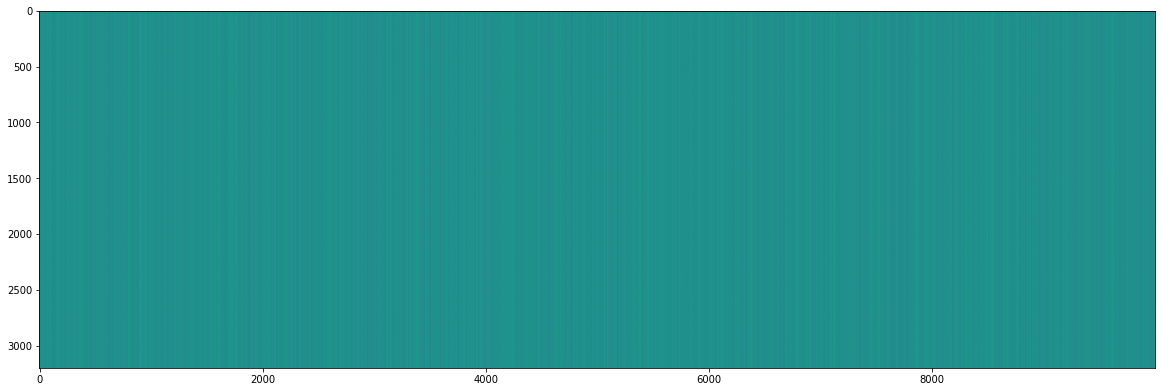

In [176]:
plt.figure(figsize=(20,20))
plt.imshow(ts_data)

In [177]:
station_dict = {}
for station in lst_failed_station : 
    query = station_dict.get(station[0],-1) 
    if query == -1 : 
        station_dict[station[0]] = station[1]
    else : 
        if type(query) != list :
            query=[query]
        station_dict[station[0]] = query + [station[1]]

In [178]:
#checking for False Negative

In [179]:
for station in station_dict.keys() : 
    i = station
    result = regression_based_outlier_detection(ts_data, neighbor, station=i, n_regressors = 5, n_variables = 2, eps=3)
    print(station, station_dict[station],'\n', i, list(result.keys()))
    print("\n")
#     plt.figure()
#     plt.plot(ts_data[neighbor[i]].T, color='gray')
#     plt.plot(ts_data[i], color='red')

930 2 
 930 []


936 10 
 936 [10]


2739 16 
 2739 [16]


23 19 
 23 [19]


1246 37 
 1246 [37]


617 50 
 617 [50]


2705 51 
 2705 [51]


1531 [56, 8865] 
 1531 [56]


328 89 
 328 []


385 155 
 385 [155]


1842 181 
 1842 [181]


648 182 
 648 [182]


11 [188, 476, 5775] 
 11 [188, 5775]


458 193 
 458 [193]


2182 203 
 2182 [203]


1447 208 
 1447 []


2311 [210, 4957] 
 2311 [210, 4957]


165 220 
 165 [220]


2527 222 
 2527 [222]


901 252 
 901 [252]


2800 [253, 1879] 
 2800 [253, 1879]


3119 259 
 3119 [259]


2408 262 
 2408 [262]


1118 265 
 1118 [265]


1653 281 
 1653 [281]


1266 323 
 1266 [323]


1835 334 
 1835 [334]


1688 342 
 1688 [342]


1683 354 
 1683 []


1350 362 
 1350 []


2593 366 
 2593 [366]


186 402 
 186 [402]


320 416 
 320 [416]


2407 426 
 2407 [426]


744 428 
 744 []


1619 435 
 1619 [435]


3024 437 
 3024 [437]


2809 438 
 2809 [438]


65 440 
 65 [440]


1631 [442, 2503] 
 1631 [442, 2503]


2039 [462, 9093] 
 2039 [462]


1498 465 


1788 3563 
 1788 [3563]


2323 3588 
 2323 [3588]


2002 3614 
 2002 []


293 [3616, 6099] 
 293 [3616]


3161 3620 
 3161 [3620]


224 3624 
 224 [3624]


1884 3634 
 1884 [3634]


1175 [3635, 8240] 
 1175 [3635, 8240]


2633 [3637, 4245] 
 2633 [3637, 4245]


628 3660 
 628 [3660]


2848 3672 
 2848 [3672]


2865 [3690, 9897] 
 2865 [3690]


815 3704 
 815 [3704]


3133 3712 
 3133 [3712]


656 [3726, 8377] 
 656 [3726, 8377]


1315 3733 
 1315 [3733]


2059 [3737, 6623] 
 2059 []


1376 [3744, 4412] 
 1376 [3744, 4412]


19 3754 
 19 []


1341 3755 
 1341 []


129 [3757, 3835] 
 129 [3757]


1922 3766 
 1922 []


770 3783 
 770 [3783]


1778 3798 
 1778 [3798]


1805 3810 
 1805 [3810]


907 3826 
 907 [3826]


959 [3832, 8261] 
 959 [3832, 8261]


1938 3838 
 1938 [3838]


391 3846 
 391 [3846]


1648 [3867, 4513] 
 1648 [3867, 4513]


1092 3870 
 1092 []


2879 3872 
 2879 [3872]


2183 3876 
 2183 [3876]


667 3883 
 667 [3883]


1237 3891 
 1237 [3891]


244 3920 
 244 []


771 

 561 [7457]


2683 7480 
 2683 [7480]


228 7491 
 228 [7491]


3059 7506 
 3059 [7506]


428 7513 
 428 [7513]


2406 7515 
 2406 []


130 7519 
 130 [7519]


2331 7521 
 2331 [7521]


202 7544 
 202 [7544]


1566 7553 
 1566 [7553]


1191 7578 
 1191 [7578]


2766 7605 
 2766 [7605]


2935 7627 
 2935 [7627]


1222 7660 
 1222 [7660]


1591 7663 
 1591 []


3198 7680 
 3198 []


1477 7686 
 1477 [7686]


1385 7719 
 1385 [7719]


659 7749 
 659 [7749]


1661 7759 
 1661 [7759]


2381 7782 
 2381 [7782]


2386 7790 
 2386 []


1154 7792 
 1154 [7792]


1079 [7795, 9447] 
 1079 []


220 7801 
 220 [7801]


966 7818 
 966 [7818]


440 7832 
 440 [7832, 5170]


357 7863 
 357 [7863]


774 7909 
 774 [7909]


2246 7912 
 2246 [7912]


686 7939 
 686 [7939]


693 7958 
 693 [7958]


1486 7959 
 1486 [7959]


256 7966 
 256 [7966]


1612 7968 
 1612 [7968]


1390 7979 
 1390 [7979]


484 8004 
 484 [8004]


963 8012 
 963 [8012]


83 8013 
 83 []


1747 8038 
 1747 [8038]


1136 8042 
 1136

In [180]:
n_stations, time_length


(3200, 10000)

In [181]:
import time
start = time.time()

for i in range(n_stations) :
    result = regression_based_outlier_detection(ts_data, neighbor, station=i, n_regressors = 5, n_variables = 2, eps=3)
#     if len(result) > 0 : 
#         print(i, list(result.keys()))
#     print("\n")
#     plt.figure()
#     plt.plot(ts_data[neighbor[i]].T, color='gray')
#     plt.plot(ts_data[i], color='red')

print(time.time() - start)

10.564630270004272
